In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('FilteredTADAData.csv')

In [16]:
#Drop first column
print(df.columns.tolist())
df = df.drop(columns='Coordinates and Times',axis=1)

['Coordinates and Times', '.ALPHA.-ENDOSULFAN', '.ALPHA.-HEXACHLOROCYCLOHEXANE', '.BETA.-ENDOSULFAN', '.BETA.-HEXACHLOROCYCLOHEXANE', '.DELTA.-HEXACHLOROCYCLOHEXANE', '.LAMBDA.-CYHALOTHRIN', '1-(3,4-DICHLOROPHENYL)-3-METHYL UREA', '1-CHLOROPROPANE', '1,1-DICHLOROETHANE', '1,1-DICHLOROETHENE', '1,1-DICHLOROPROPENE', '1,1,1-TRICHLOROETHANE', '1,1,1,2-TETRACHLOROETHANE', '1,1,2-TRICHLOROETHANE', '1,1,2,2-TETRACHLOROETHANE', '1,2-DIBROMO-3-CHLOROPROPANE', '1,2-DICHLOROETHANE', '1,2-DICHLOROPROPANE', '1,2-DIPHENYLHYDRAZINE', '1,2,3-TRICHLOROBENZENE', '1,2,3-TRICHLOROPROPANE', '1,2,4-TRICHLOROBENZENE', '1,2,4-TRIMETHYLBENZENE', '1,3-DICHLOROBENZENE', '1,3-DICHLOROPROPANE', '1,3,5-TRIMETHYLBENZENE', '1,4-DIOXANE', '2-CHLORO-4-ISOPROPYLAMINO-6-AMINO-S-TRIAZINE', '2-CHLORONAPHTHALENE', '2-ETHYLHEXYL-2,3,4,5-TETRABROMOBENZOATE', '2-HEXANONE', '2-HYDROXY-4-METHOXYBENZOPHENONE', '2-METHYLISOBORNEOL', '2,2-DICHLOROPROPANE', "2,2',4,4'-TETRABROMINATED DIPHENYL ETHER", '2,4-D', '2,4-DICHLOROPHENOL', 

In [17]:
df=df.astype('float')
df = df.replace(np.nan,'',regex=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69031 entries, 0 to 69030
Columns: 713 entries, .ALPHA.-ENDOSULFAN to ZOXAMIDE
dtypes: object(713)
memory usage: 375.5+ MB


In [75]:
#Converting object types to numeric values
#These columns come from the original dataset, we want to focus on these parameters
df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'] = pd.to_numeric(df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'], errors='coerce')
df['PHOSPHORUS'] = pd.to_numeric(df['PHOSPHORUS'], errors='coerce')
df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'] = pd.to_numeric(df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'], errors='coerce')


In [76]:
df2 = pd.DataFrame()
df2['phosphate'] = df['PHOSPHORUS']
df2['chlor'] = df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN']
df2['nitrogen'] = df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']
df2 = df2.dropna()
df2.head()

,phosphate,chlor,nitrogen
9,5.0,3.0,340.0
12,6.0,3.0,320.0
15,6.0,3.0,360.0
18,9.0,3.0,330.0
19,5.0,4.0,320.0


In [77]:
#Splitting the dataframe into input and output data

y = df2['nitrogen']
X = df2.iloc[:, df2.columns != 'nitrogen']


In [78]:
#Preparation for a train-test split to evaluate the machine learning algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)

#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [79]:
#Testing SVR Regression Model
from sklearn.svm import SVR

model = SVR(kernel ='rbf')
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 9.10%
The accuracy for the test set is 8.30%


In [80]:
#Testing RandomForestRegressor Regression Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 85.67%
The accuracy for the test set is 39.46%


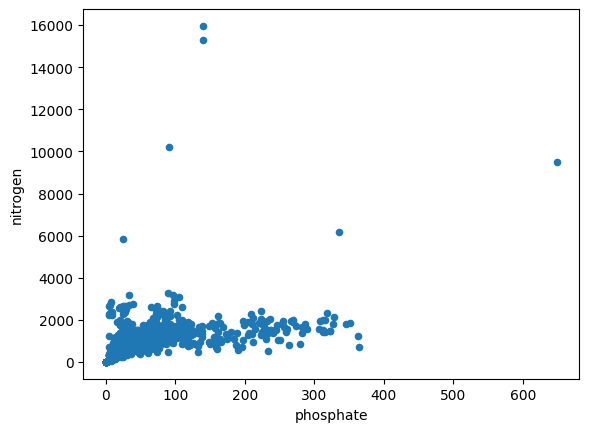

In [82]:
#ax = plt.subplot(111)
df2.plot(x='phosphate',y='nitrogen', kind='scatter')
#ax.set_xlim(0,200)
#ax.set_ylim(0,4000)
plt.show()